In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from Scripts import *
print(DATA_HOME)

E:\Msc\LabTest\stockAnalysis\datab


In [3]:
# Read Data 
apollohosp = pd.read_csv(DATA_HOME+'\\apollohosp\\apollohosp_expsetup2.csv')
apollohosp.head()

,Date,FibonacciLevels,PBDT,RSI,macd,Volume,EPS (Rs),CI
0,2016-01-01,1416.966919,73.0,64.077246,27.112706,107024,5.23,56.635556
1,2016-01-04,1413.055129,73.0,60.422239,25.887594,121226,5.23,59.080965
2,2016-01-05,1464.590068,73.0,64.203471,26.068095,667535,5.23,52.770482
3,2016-01-06,1447.281599,73.0,59.805908,24.886641,233987,5.23,57.806178
4,2016-01-07,1417.944733,73.0,44.991438,19.098288,184861,5.23,54.026040


In [4]:
apollohosp['Date'] = pd.to_datetime(apollohosp['Date'],format='%Y-%m-%d')
apollohosp = apollohosp.set_index('Date')
apollohosp.head()

,FibonacciLevels,PBDT,RSI,macd,Volume,EPS (Rs),CI
Date,,,,,,,
2016-01-01,1416.966919,73.0,64.077246,27.112706,107024,5.23,56.635556
2016-01-04,1413.055129,73.0,60.422239,25.887594,121226,5.23,59.080965
2016-01-05,1464.590068,73.0,64.203471,26.068095,667535,5.23,52.770482
2016-01-06,1447.281599,73.0,59.805908,24.886641,233987,5.23,57.806178
2016-01-07,1417.944733,73.0,44.991438,19.098288,184861,5.23,54.026040


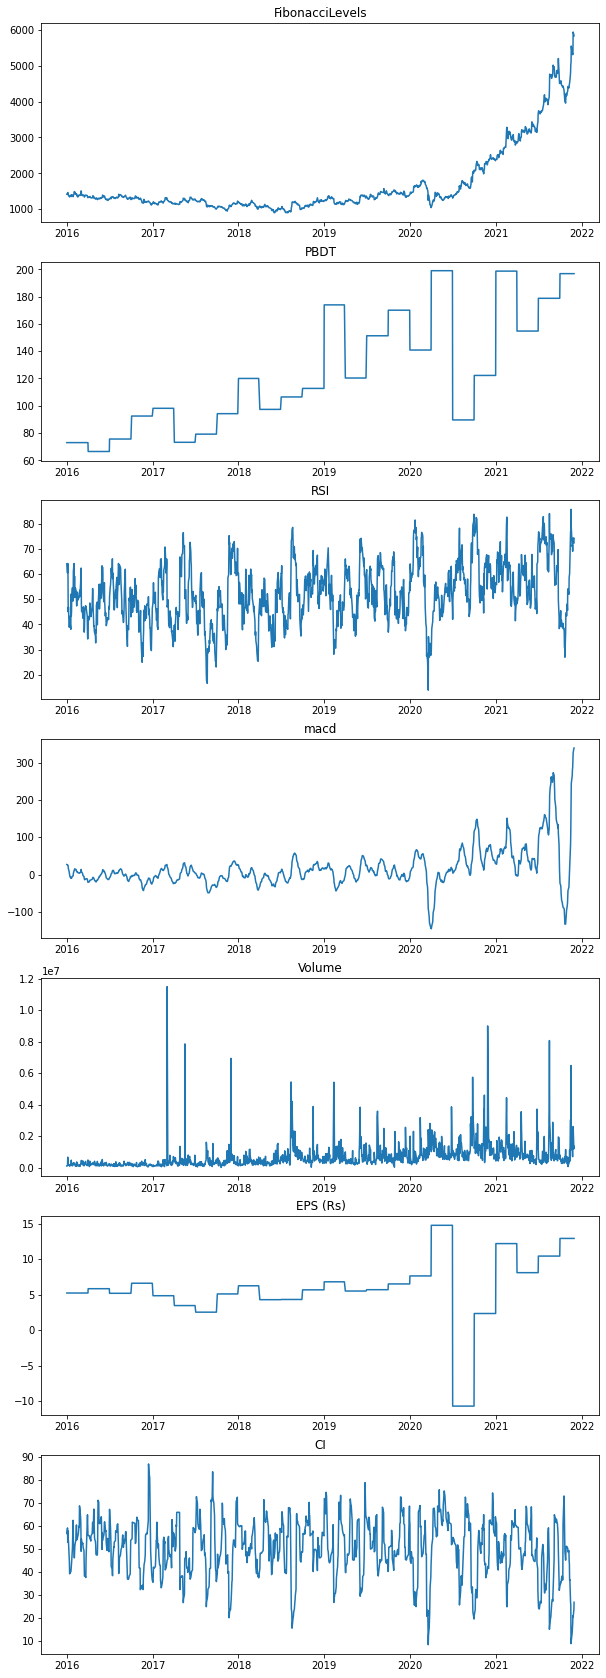

2021-11-30 00:00:00 2016-01-01 00:00:00


In [5]:
plt.figure(figsize=(10,30))
for i,j in enumerate(apollohosp.columns):
    plt.subplot(7,1,i+1)
    plt.plot(apollohosp[j])
    plt.title(j)
plt.show()
print(apollohosp.index.max(),apollohosp.index.min())

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()
apollohosp_norm = scaler.fit_transform(apollohosp)

apollohosp_df = pd.DataFrame(apollohosp_norm,columns=apollohosp.columns,index=apollohosp.index)
apollohosp_df.head()

,FibonacciLevels,PBDT,RSI,macd,Volume,EPS (Rs),CI
Date,,,,,,,
2016-01-01,0.102895,0.049117,0.698908,0.355600,0.008037,0.62549,0.615202
2016-01-04,0.102118,0.049117,0.648042,0.353067,0.009275,0.62549,0.646230
2016-01-05,0.112350,0.049117,0.700664,0.353440,0.056877,0.62549,0.566160
2016-01-06,0.108914,0.049117,0.639465,0.350998,0.019100,0.62549,0.630055
2016-01-07,0.103089,0.049117,0.433295,0.339033,0.014820,0.62549,0.582091


In [8]:
apollohosp_train =apollohosp_df['2016-01-01':'2021-05-31']
apollohosp_val =apollohosp_df['2021-07-01':'2021-09-30']
apollohosp_test =apollohosp_df['2021-10-01':]

In [9]:
apollohosp_train.shape,apollohosp_val.shape,apollohosp_test.shape

((1334, 7), (63, 7), (40, 7))

In [12]:
# creating data set in timeseries
def XY_split(datadf,timestep):
    X=[]
    y=[]
    for i in range(len(datadf)-1-(timestep)):
        X.append(datadf[i:i+timestep])
        y.append(datadf[i+timestep:i+timestep+1]['FibonacciLevels'])
    return np.array(X),np.array(y)

In [13]:
X_train,y_train = XY_split(apollohosp_train,timestep=28)
X_val,y_val=XY_split(apollohosp_val,timestep=28)
X_test,y_test=XY_split(apollohosp_test,timestep=28)

In [14]:
n,m,k =X_train.shape
X_train = X_train.reshape(n,m*k)
y_train=y_train[:,0]



In [15]:
n,m,k =X_val.shape
X_val = X_val.reshape(n,m*k)
y_val=y_val[:,0]

In [16]:
n,m,k =X_test.shape
X_test = X_test.reshape(n,m*k)
y_test=y_test[:,0]

In [17]:
X_train.shape,y_train.shape

((1305, 196), (1305,))

In [49]:
# Create Random seed
tf.random.set_seed(42)

# Create 1st Model
model_RNN1 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],1),name='InputLayer'),
    #tf.keras.layers.Dense(196,activation='relu',input_shape=(X_train.shape[1],1)),
    tf.keras.layers.SimpleRNN(50),
    tf.keras.layers.Dense(1)
])



# Compile the model
model_RNN1.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
                   metrics=['mse'])

# Model summary

history_model_RNN1 = model_RNN1.fit(X_train,y_train,epochs=20,validation_data=(X_val,y_val))

Epoch 1/20
41/41 [==============================] - 4s 66ms/step - loss: 0.5892 - mse: 0.3781 - val_loss: 0.9809 - val_mse: 0.9745
Epoch 2/20
41/41 [==============================] - 2s 55ms/step - loss: 0.2932 - mse: 0.1090 - val_loss: 0.8002 - val_mse: 0.6519
Epoch 3/20
41/41 [==============================] - 2s 56ms/step - loss: 0.1291 - mse: 0.0295 - val_loss: 0.6941 - val_mse: 0.4931
Epoch 4/20
41/41 [==============================] - 2s 54ms/step - loss: 0.0966 - mse: 0.0186 - val_loss: 0.6666 - val_mse: 0.4555
Epoch 5/20
41/41 [==============================] - 2s 57ms/step - loss: 0.0943 - mse: 0.0175 - val_loss: 0.6605 - val_mse: 0.4473
Epoch 6/20
41/41 [==============================] - 2s 56ms/step - loss: 0.0936 - mse: 0.0172 - val_loss: 0.6581 - val_mse: 0.4440
Epoch 7/20
41/41 [==============================] - 2s 57ms/step - loss: 0.0929 - mse: 0.0169 - val_loss: 0.6570 - val_mse: 0.4425
Epoch 8/20
41/41 [==============================] - 2s 55ms/step - loss: 0.0923 - m

In [46]:
model_RNN1.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:title={'center':'Train and Validation Loss for SGD at learning rate 0.0001'}>

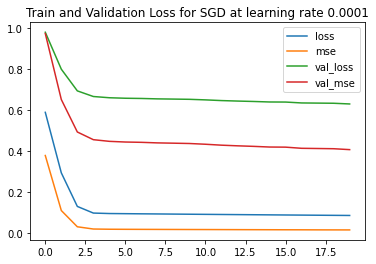

In [50]:
# Plotting the Training process
pd.DataFrame(history_model_RNN1.history).plot(title="Train and Validation Loss for SGD at learning rate 0.0001")

In [51]:
# Create Random seed
tf.random.set_seed(42)

# Create 2nd Model
model_RNN2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],1)),
    #tf.keras.layers.Dense(196,activation='relu',input_shape=(X_train.shape[1],1)),
    tf.keras.layers.SimpleRNN(50),
    tf.keras.layers.Dense(1)
])



# Compile the model
model_RNN2.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                   metrics=['mse'])

# Model summary

history_model_RNN2 = model_RNN2.fit(X_train,y_train,epochs=20,validation_data=(X_val,y_val))

Epoch 1/20
41/41 [==============================] - 4s 72ms/step - loss: 0.2854 - mse: 0.1402 - val_loss: 0.6108 - val_mse: 0.3831
Epoch 2/20
41/41 [==============================] - 2s 56ms/step - loss: 0.0866 - mse: 0.0145 - val_loss: 0.6399 - val_mse: 0.4180
Epoch 3/20
41/41 [==============================] - 2s 57ms/step - loss: 0.0759 - mse: 0.0118 - val_loss: 0.6005 - val_mse: 0.3677
Epoch 4/20
41/41 [==============================] - 2s 54ms/step - loss: 0.0660 - mse: 0.0093 - val_loss: 0.5436 - val_mse: 0.3012
Epoch 5/20
41/41 [==============================] - 2s 53ms/step - loss: 0.0551 - mse: 0.0066 - val_loss: 0.4583 - val_mse: 0.2144
Epoch 6/20
41/41 [==============================] - 2s 57ms/step - loss: 0.0457 - mse: 0.0047 - val_loss: 0.4228 - val_mse: 0.1820
Epoch 7/20
41/41 [==============================] - 3s 64ms/step - loss: 0.0381 - mse: 0.0035 - val_loss: 0.3812 - val_mse: 0.1479
Epoch 8/20
41/41 [==============================] - 2s 60ms/step - loss: 0.0352 - m

<AxesSubplot:title={'center':'Train and Validation Loss for Adam at learning rate 0.0001'}>

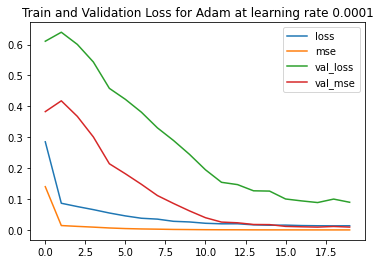

In [52]:
# Plotting the Training process
pd.DataFrame(history_model_RNN2.history).plot(title="Train and Validation Loss for Adam at learning rate 0.0001")

### We can see that Adam is learning faster

In [37]:
# Create Random seed
tf.random.set_seed(42)

# Create 3rd Model
model_RNN3 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],1)),
    #tf.keras.layers.Dense(196,activation='relu',input_shape=(X_train.shape[1],1)),
    tf.keras.layers.SimpleRNN(56,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu')
])

def scheduler(epoch, lr):
    if epoch<5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Compile the model
model_RNN3.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=['mae'])

# Model summary

history_model_RNN3 = model_RNN3.fit(X_train,y_train,epochs=40,validation_data=(X_val,y_val),callbacks=[lr_scheduler],verbose=0)

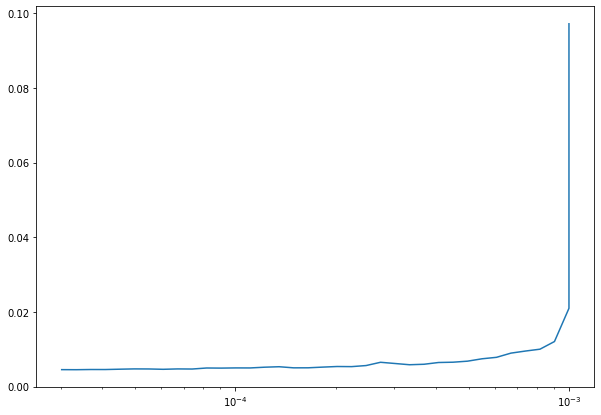

In [38]:
# Plotting the loss vs learning rate
plt.figure(figsize=(10,7))
plt.semilogx(history_model_RNN3.history['lr'],history_model_RNN3.history['loss'])


In [39]:
### The optimum learning rate is between 10^-3 and 10^-4 towards 10^-3 
#We will keep it slightly lower than observed, almost 5*10^-4 or 0.0005
opt_lr = 0.0005
# Best optimizer is Adam


In [ ]:
# Create Random seed
tf.random.set_seed(42)

# Create 4th Model
model_RNN4 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],1)),
    #tf.keras.layers.Dense(196,activation='relu',input_shape=(X_train.shape[1],1)),
    tf.keras.layers.SimpleRNN(60,activation='relu'),
    tf.keras.layers.Dense(1)
])



# Compile the model
model_RNN4.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(learning_rate=opt_lr),
                   metrics=['mse'])

# Model summary

history_model_RNN4 = model_RNN4.fit(X_train,y_train,epochs=40,validation_data=(X_val,y_val))

Epoch 1/40
41/41 [==============================] - 4s 70ms/step - loss: 0.1314 - mse: 0.0333 - val_loss: 0.6381 - val_mse: 0.4102
Epoch 2/40
41/41 [==============================] - 2s 54ms/step - loss: 0.0574 - mse: 0.0103 - val_loss: 0.5805 - val_mse: 0.3402
Epoch 3/40
41/41 [==============================] - 2s 56ms/step - loss: 0.0427 - mse: 0.0060 - val_loss: 0.4226 - val_mse: 0.1816
Epoch 4/40
41/41 [==============================] - 2s 58ms/step - loss: 0.0283 - mse: 0.0021 - val_loss: 0.2483 - val_mse: 0.0661
Epoch 5/40
41/41 [==============================] - 2s 57ms/step - loss: 0.0147 - mse: 4.4581e-04 - val_loss: 0.1626 - val_mse: 0.0300
Epoch 6/40
41/41 [==============================] - 3s 67ms/step - loss: 0.0103 - mse: 2.1086e-04 - val_loss: 0.1697 - val_mse: 0.0318
Epoch 7/40
41/41 [==============================] - 3s 64ms/step - loss: 0.0091 - mse: 1.6658e-04 - val_loss: 0.1552 - val_mse: 0.0268
Epoch 8/40
41/41 [==============================] - 3s 62ms/step - loss

<AxesSubplot:title={'center':'Model Trained with optimal parameters'}>

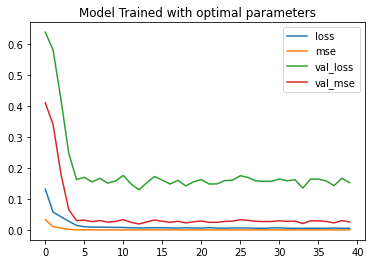

In [54]:
pd.DataFrame(history_model_RNN4.history).plot(title='Model Trained with optimal parameters')

In [29]:
y_pred_train = model_RNN4.predict(X_train)
y_pred_test = model_RNN4.predict(X_test)


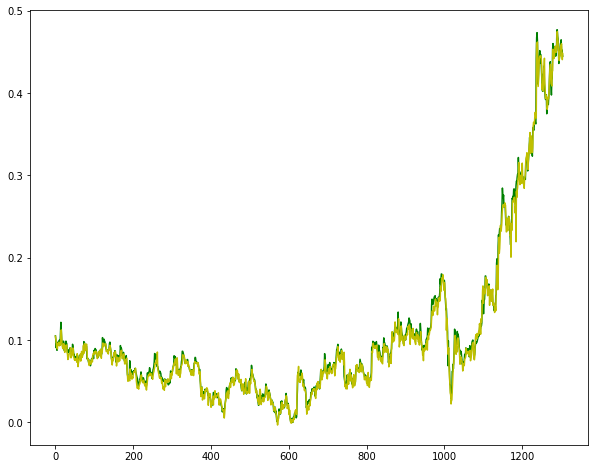

In [56]:
plt.figure(figsize=(10,8))
plt.plot(y_train,'g')
plt.plot(y_pred_train,'y')


In [31]:
y_train

array([0.10501134, 0.09978853, 0.09046916, ..., 0.45217169, 0.44731031,
       0.44461175])

In [32]:
y_pred_train

array([[0.1046793 ],
       [0.10094605],
       [0.09786359],
       ...,
       [0.4463334 ],
       [0.44037187],
       [0.44774944]], dtype=float32)

In [33]:
# Calculate RMSE and MSE
from sklearn.metrics import mean_squared_error

rmse=np.sqrt(mean_squared_error(y_train,y_pred_train)).round(4)
mape=np.round(np.mean(np.abs(y_train-y_pred_train)/len(y_train))*100,4)

results = pd.DataFrame({"Method":['Simple RNN Model Train'],'MAPE':[mape],'RMSE':[rmse]})
results

,Method,MAPE,RMSE
0,Simple RNN Model Train,0.0071,0.0075


In [34]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred_test)).round(4)
mape=np.round(np.mean(np.abs(y_test-y_pred_test)/len(y_test))*100,4)

results2 = pd.DataFrame({"Method":['Simple RNN Model Test'],'MAPE':[mape],'RMSE':[rmse]})
results = pd.concat([results,results2],axis=0)
results

,Method,MAPE,RMSE
0,Simple RNN Model Train,0.0071,0.0075
0,Simple RNN Model Test,2.3454,0.2643


In [ ]:
results.to_csv('Experimental_Results1.csv')

In [ ]:
model_RNN4.save('models_saved/SimpleRNNmodel.h5')

In [48]:
model_RNN4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 60)                3720      
                                                                 
 dense_4 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3,781
Trainable params: 3,781
Non-trainable params: 0
_________________________________________________________________


## Dabur

In [58]:
# Read Data 
dabur = pd.read_csv(DATA_HOME+'\\dabur\\dabur_expsetup2.csv')
dabur.head()

,Date,FibonacciLevels,PBDT,RSI,macd,Volume,EPS (Rs),CI
0,2016-01-01,257.125140,85.89,54.508074,16.100488,124367,1.3,59.565059
1,2016-01-04,262.020561,85.89,48.308730,12.228003,554107,1.3,77.614801
2,2016-01-05,260.621858,85.89,46.946990,8.029225,629235,1.3,74.917170
3,2016-01-06,261.927240,85.89,39.421521,-1.800329,750275,1.3,55.815378
4,2016-01-07,256.425841,85.89,27.633197,-25.416438,910959,1.3,30.485256


In [59]:
dabur['Date'] = pd.to_datetime(dabur['Date'],format='%Y-%m-%d')
dabur = dabur.set_index('Date')
dabur.head()

,FibonacciLevels,PBDT,RSI,macd,Volume,EPS (Rs),CI
Date,,,,,,,
2016-01-01,257.125140,85.89,54.508074,16.100488,124367,1.3,59.565059
2016-01-04,262.020561,85.89,48.308730,12.228003,554107,1.3,77.614801
2016-01-05,260.621858,85.89,46.946990,8.029225,629235,1.3,74.917170
2016-01-06,261.927240,85.89,39.421521,-1.800329,750275,1.3,55.815378
2016-01-07,256.425841,85.89,27.633197,-25.416438,910959,1.3,30.485256


In [60]:
scaler_dabur = MinMaxScaler()
dabur_norm = scaler_dabur.fit_transform(dabur)

dabur_df = pd.DataFrame(dabur_norm,columns=dabur.columns,index=dabur.index)
dabur_df.head()

,FibonacciLevels,PBDT,RSI,macd,Volume,EPS (Rs),CI
Date,,,,,,,
2016-01-01,0.089844,0.348466,0.518787,0.653519,0.001912,0.244604,0.699634
2016-01-04,0.101008,0.348466,0.432311,0.649288,0.025161,0.244604,0.944453
2016-01-05,0.097818,0.348466,0.413316,0.644701,0.029225,0.244604,0.907864
2016-01-06,0.100795,0.348466,0.308341,0.633962,0.035774,0.244604,0.648775
2016-01-07,0.088249,0.348466,0.143903,0.608162,0.044467,0.244604,0.305207


In [61]:
dabur_train =dabur_df['2016-01-01':'2021-05-31']
dabur_val =dabur_df['2021-07-01':'2021-09-30']
dabur_test =dabur_df['2021-10-01':]


X_train,y_train = XY_split(dabur_train,timestep=28)
X_val,y_val=XY_split(dabur_val,timestep=28)
X_test,y_test=XY_split(dabur_test,timestep=28)


n,m,k =X_train.shape
X_train = X_train.reshape(n,m*k)
y_train=y_train[:,0]

n,m,k =X_val.shape
X_val = X_val.reshape(n,m*k)
y_val=y_val[:,0]

n,m,k =X_test.shape
X_test = X_test.reshape(n,m*k)
y_test=y_test[:,0]

In [63]:

# Create Random seed
tf.random.set_seed(42)

# Create 4th Model
model_RNN = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],1)),
    #tf.keras.layers.Dense(196,activation='relu',input_shape=(X_train.shape[1],1)),
    tf.keras.layers.SimpleRNN(60,activation='relu'),
    tf.keras.layers.Dense(1)
])



# Compile the model
model_RNN.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(learning_rate=opt_lr),
                   metrics=['mse'])

# Model summary

history_model_RNN = model_RNN.fit(X_train,y_train,epochs=40,validation_data=(X_val,y_val))

Epoch 1/40
37/37 [==============================] - 4s 68ms/step - loss: 0.3642 - mse: 0.1908 - val_loss: 0.4079 - val_mse: 0.1690
Epoch 2/40
37/37 [==============================] - 2s 56ms/step - loss: 0.1564 - mse: 0.0354 - val_loss: 0.3253 - val_mse: 0.1077
Epoch 3/40
37/37 [==============================] - 2s 56ms/step - loss: 0.1317 - mse: 0.0251 - val_loss: 0.3082 - val_mse: 0.0969
Epoch 4/40
37/37 [==============================] - 2s 57ms/step - loss: 0.0989 - mse: 0.0150 - val_loss: 0.1805 - val_mse: 0.0343
Epoch 5/40
37/37 [==============================] - 2s 59ms/step - loss: 0.0522 - mse: 0.0048 - val_loss: 0.0924 - val_mse: 0.0100
Epoch 6/40
37/37 [==============================] - 2s 57ms/step - loss: 0.0347 - mse: 0.0022 - val_loss: 0.0849 - val_mse: 0.0081
Epoch 7/40
37/37 [==============================] - 2s 58ms/step - loss: 0.0304 - mse: 0.0017 - val_loss: 0.1311 - val_mse: 0.0182
Epoch 8/40
37/37 [==============================] - 2s 57ms/step - loss: 0.0314 - m

<AxesSubplot:title={'center':'Model Trained with optimal parameters'}>

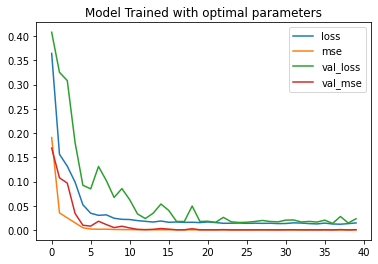

In [64]:
pd.DataFrame(history_model_RNN.history).plot(title='Model Trained with optimal parameters')


In [65]:
y_pred_train = model_RNN.predict(X_train)
y_pred_test = model_RNN.predict(X_test)

In [66]:
# Calculate RMSE and MSE
from sklearn.metrics import mean_squared_error

rmse=np.sqrt(mean_squared_error(y_train,y_pred_train)).round(4)
mape=np.round(np.mean(np.abs(y_train-y_pred_train)/len(y_train))*100,4)

results_dabur = pd.DataFrame({"Method":['Simple RNN Model Train'],'MAPE':[mape],'RMSE':[rmse]})
results_dabur

rmse=np.sqrt(mean_squared_error(y_test,y_pred_test)).round(4)
mape=np.round(np.mean(np.abs(y_test-y_pred_test)/len(y_test))*100,4)

results2 = pd.DataFrame({"Method":['Simple RNN Model Test'],'MAPE':[mape],'RMSE':[rmse]})
results = pd.concat([results_dabur,results2],axis=0)
results

,Method,MAPE,RMSE
0,Simple RNN Model Train,0.0204,0.0186
0,Simple RNN Model Test,0.1117,0.0160


## Maruti

In [67]:
# Read Data 
maruti = pd.read_csv(DATA_HOME+'\\maruti\\maruti_expsetup2.csv')
maruti.head()

,Date,FibonacciLevels,PBDT,RSI,macd,Volume,EPS (Rs),CI
0,2016-01-01,4379.951124,1308.8,54.508074,16.100488,243597,57.84,59.565059
1,2016-01-04,4369.630461,1308.8,48.308730,12.228003,405501,57.84,77.614801
2,2016-01-05,4316.851326,1308.8,46.946990,8.029225,509285,57.84,74.917170
3,2016-01-06,4309.578382,1308.8,39.421521,-1.800329,593742,57.84,55.815378
4,2016-01-07,4175.121957,1308.8,27.633197,-25.416438,1200069,57.84,30.485256


In [68]:
maruti['Date'] = pd.to_datetime(maruti['Date'],format='%Y-%m-%d')
maruti = maruti.set_index('Date')



scaler_maruti = MinMaxScaler()
maruti_norm = scaler_maruti.fit_transform(maruti)

maruti_df = pd.DataFrame(maruti_norm,columns=maruti.columns,index=maruti.index)


maruti_train =maruti_df['2016-01-01':'2021-05-31']
maruti_val =maruti_df['2021-07-01':'2021-09-30']
maruti_test =maruti_df['2021-10-01':]


X_train,y_train = XY_split(maruti_train,timestep=28)
X_val,y_val=XY_split(maruti_val,timestep=28)
X_test,y_test=XY_split(maruti_test,timestep=28)


n,m,k =X_train.shape
X_train = X_train.reshape(n,m*k)
y_train=y_train[:,0]

n,m,k =X_val.shape
X_val = X_val.reshape(n,m*k)
y_val=y_val[:,0]

n,m,k =X_test.shape
X_test = X_test.reshape(n,m*k)
y_test=y_test[:,0]

In [69]:
# Create Random seed
tf.random.set_seed(42)

# Create 4th Model
model_RNN = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],1)),
    #tf.keras.layers.Dense(196,activation='relu',input_shape=(X_train.shape[1],1)),
    tf.keras.layers.SimpleRNN(60,activation='relu'),
    tf.keras.layers.Dense(1)
])



# Compile the model
model_RNN.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(learning_rate=opt_lr),
                   metrics=['mse'])

# Model summary

history_model_RNN = model_RNN.fit(X_train,y_train,epochs=40,validation_data=(X_val,y_val))

Epoch 1/40
41/41 [==============================] - 5s 74ms/step - loss: 0.4663 - mse: 0.2911 - val_loss: 0.1293 - val_mse: 0.0174
Epoch 2/40
41/41 [==============================] - 2s 60ms/step - loss: 0.1742 - mse: 0.0490 - val_loss: 0.1871 - val_mse: 0.0357
Epoch 3/40
41/41 [==============================] - 3s 62ms/step - loss: 0.1565 - mse: 0.0413 - val_loss: 0.1262 - val_mse: 0.0165
Epoch 4/40
41/41 [==============================] - 2s 57ms/step - loss: 0.1281 - mse: 0.0286 - val_loss: 0.1115 - val_mse: 0.0134
Epoch 5/40
41/41 [==============================] - 3s 63ms/step - loss: 0.0705 - mse: 0.0087 - val_loss: 0.0460 - val_mse: 0.0029
Epoch 6/40
41/41 [==============================] - 3s 62ms/step - loss: 0.0419 - mse: 0.0033 - val_loss: 0.0218 - val_mse: 0.0012
Epoch 7/40
41/41 [==============================] - 3s 61ms/step - loss: 0.0308 - mse: 0.0017 - val_loss: 0.0212 - val_mse: 0.0011
Epoch 8/40
41/41 [==============================] - 2s 59ms/step - loss: 0.0244 - m

<AxesSubplot:title={'center':'Model Trained with optimal parameters'}>

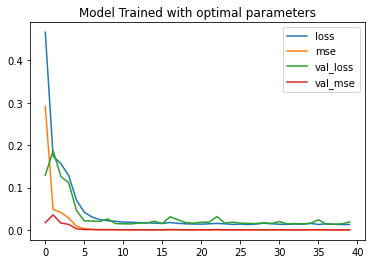

In [70]:
pd.DataFrame(history_model_RNN.history).plot(title='Model Trained with optimal parameters')

In [71]:
y_pred_train = model_RNN.predict(X_train)
y_pred_test = model_RNN.predict(X_test)

In [72]:
# Calculate RMSE and MSE
from sklearn.metrics import mean_squared_error

rmse=np.sqrt(mean_squared_error(y_train,y_pred_train)).round(4)
mape=np.round(np.mean(np.abs(y_train-y_pred_train)/len(y_train))*100,4)

results_maruti = pd.DataFrame({"Method":['Simple RNN Model Train'],'MAPE':[mape],'RMSE':[rmse]})
results_maruti

rmse=np.sqrt(mean_squared_error(y_test,y_pred_test)).round(4)
mape=np.round(np.mean(np.abs(y_test-y_pred_test)/len(y_test))*100,4)

results2 = pd.DataFrame({"Method":['Simple RNN Model Test'],'MAPE':[mape],'RMSE':[rmse]})
results = pd.concat([results_maruti,results2],axis=0)
results

,Method,MAPE,RMSE
0,Simple RNN Model Train,0.0197,0.0181
0,Simple RNN Model Test,0.5386,0.0400


In [73]:
# Read Data 
tcs = pd.read_csv(DATA_HOME+'\\tcs\\tcs_expsetup2.csv')
tcs.head()


tcs['Date'] = pd.to_datetime(tcs['Date'],format='%Y-%m-%d')
tcs = tcs.set_index('Date')
tcs.head()

,FibonacciLevels,PBDT,RSI,macd,Volume,EPS (Rs),CI
Date,,,,,,,
2016-01-01,1085.760138,2021.0,49.977956,3.090838,712262,30.88,51.003901
2016-01-04,1074.631056,2021.0,42.641751,0.959940,1870184,30.88,61.611077
2016-01-05,1062.433668,2021.0,39.861366,-1.453821,2678020,30.88,54.688026
2016-01-06,1062.233305,2021.0,45.871070,-2.168907,2653228,30.88,55.111016
2016-01-07,1060.786485,2021.0,44.357805,-3.071995,3199580,30.88,55.261932


In [74]:
scaler_tcs = MinMaxScaler()
tcs_norm = scaler_tcs.fit_transform(tcs)

tcs_df = pd.DataFrame(tcs_norm,columns=tcs.columns,index=tcs.index)
tcs_df.head()

tcs_train =tcs_df['2016-01-01':'2021-05-31']
tcs_val =tcs_df['2021-07-01':'2021-09-30']
tcs_test =tcs_df['2021-10-01':]


X_train,y_train = XY_split(tcs_train,timestep=28)
X_val,y_val=XY_split(tcs_val,timestep=28)
X_test,y_test=XY_split(tcs_test,timestep=28)


n,m,k =X_train.shape
X_train = X_train.reshape(n,m*k)
y_train=y_train[:,0]

n,m,k =X_val.shape
X_val = X_val.reshape(n,m*k)
y_val=y_val[:,0]

n,m,k =X_test.shape
X_test = X_test.reshape(n,m*k)
y_test=y_test[:,0]


In [75]:
# Create Random seed
tf.random.set_seed(42)

# Create 4th Model
model_RNN = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],1)),
    #tf.keras.layers.Dense(196,activation='relu',input_shape=(X_train.shape[1],1)),
    tf.keras.layers.SimpleRNN(60,activation='relu'),
    tf.keras.layers.Dense(1)
])



# Compile the model
model_RNN.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(learning_rate=opt_lr),
                   metrics=['mse'])

# Model summary

history_model_RNN = model_RNN.fit(X_train,y_train,epochs=40,validation_data=(X_val,y_val))

Epoch 1/40
41/41 [==============================] - 5s 85ms/step - loss: 0.2728 - mse: 0.1158 - val_loss: 0.4632 - val_mse: 0.2171
Epoch 2/40
41/41 [==============================] - 3s 75ms/step - loss: 0.0876 - mse: 0.0145 - val_loss: 0.3127 - val_mse: 0.0991
Epoch 3/40
41/41 [==============================] - 3s 73ms/step - loss: 0.0502 - mse: 0.0053 - val_loss: 0.2954 - val_mse: 0.0886
Epoch 4/40
41/41 [==============================] - 3s 72ms/step - loss: 0.0403 - mse: 0.0032 - val_loss: 0.1523 - val_mse: 0.0241
Epoch 5/40
41/41 [==============================] - 3s 74ms/step - loss: 0.0333 - mse: 0.0020 - val_loss: 0.1013 - val_mse: 0.0113
Epoch 6/40
41/41 [==============================] - 3s 69ms/step - loss: 0.0232 - mse: 9.6992e-04 - val_loss: 0.0882 - val_mse: 0.0096
Epoch 7/40
41/41 [==============================] - 3s 74ms/step - loss: 0.0169 - mse: 5.2488e-04 - val_loss: 0.0871 - val_mse: 0.0099
Epoch 8/40
41/41 [==============================] - 3s 66ms/step - loss: 0.

<AxesSubplot:title={'center':'Model Trained with optimal parameters'}>

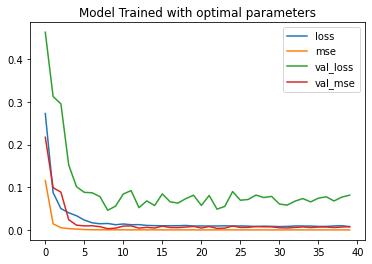

In [76]:
pd.DataFrame(history_model_RNN.history).plot(title='Model Trained with optimal parameters')

In [77]:
y_pred_train = model_RNN.predict(X_train)
y_pred_test = model_RNN.predict(X_test)

In [78]:
rmse=np.sqrt(mean_squared_error(y_train,y_pred_train)).round(4)
mape=np.round(np.mean(np.abs(y_train-y_pred_train)/len(y_train))*100,4)

results_tcs = pd.DataFrame({"Method":['Simple RNN Model Train'],'MAPE':[mape],'RMSE':[rmse]})
results_tcs

rmse=np.sqrt(mean_squared_error(y_test,y_pred_test)).round(4)
mape=np.round(np.mean(np.abs(y_test-y_pred_test)/len(y_test))*100,4)

results2 = pd.DataFrame({"Method":['Simple RNN Model Test'],'MAPE':[mape],'RMSE':[rmse]})
results = pd.concat([results_tcs,results2],axis=0)
results

,Method,MAPE,RMSE
0,Simple RNN Model Train,0.0168,0.0119
0,Simple RNN Model Test,0.6121,0.0715
